In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn import metrics, tree
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

# Heart Disease Dataset

Źródło: https://www.kaggle.com/johnsmith88/heart-disease-dataset

Dana baza - 1025 rekordów

Informacje o kolumnach (14):
- `age`: wiek
- `sex`: płeć
- `cp`: rodzaj bólu w klatce piersiowej (skala 1-4)
- `trestbps`: ciśnienie krwi
- `chol`: cholesterol
- `fbs`: poziom cukru we krwi
- `restecg`: wyniki elektrokardiograficzne (wartości 0,1,2)
- `thalach`: maks. tętno
- `exang`: dławica wysiłkowa
- `oldpeak` obniżenie ST wywołane wysiłkiem fizycznym w stosunku do odpoczynku
- `slope`: nachylenie szczytowego odcinka ST wysiłkowego
- `ca`: liczba głównych naczyń (0-3) zabarwionych florezopią
- `thal`: 0 = normalny; 1 = naprawiona wada; 2 = odwracalna wada
- `target`: 0 = mniejsza szansa na atak serca 1 = większa szansa na atak serca

## Klasyfikacja:
Jaka szansa na atak serca (ostatnia kolumna)

In [2]:
data = pd.read_csv("./heart.csv")

print(data)
data_values = data.values

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [3]:
zeros = 0
ones = 0
for i in data.target.to_list():
    if (i==1):
        ones +=1
    elif (i==0):
        zeros += 1

print("Less chance of heart attack:", zeros, "people")
print("More chance of heart attack:", ones, "people")

Less chance of heart attack: 499 people
More chance of heart attack: 526 people


In [4]:
print(data.isnull().sum())

print("\nTotal missing values in database:", data.isnull().sum().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total missing values in database: 0


### Normalizacja

In [5]:
# data[['chol']] = (data['chol']-data['chol'].min())/(data['chol'].max()-data['chol'].min())

# data[['trestbps']] = (data['trestbps']-data['trestbps'].min())/(data['trestbps'].max()-data['trestbps'].min())

# data[['thalach']] = (data['thalach']-data['thalach'].min())/(data['thalach'].max()-data['thalach'].min())

# print(data)

### Standaryzacja

In [6]:
# data['chol'] = (data['chol']-data['chol'].mean())/(data['chol'].std())

# data['trestbps'] = (data['trestbps']-data['trestbps'].mean())/(data['trestbps'].std())

# data['thalach'] = (data['thalach']-data['thalach'].mean())/(data['thalach'].std())

# print(data)

### Randomowy podział danych na zbiór testowy i treningowy

In [7]:
X = data_values[:, 0:-2]
y = data_values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=1, stratify=y)
print(X_train)
print('-------')
print(X_test)
print('-------')
print(y_train)
print('-------')
print(y_test)

[[52.   1.   1.  ...  0.8  2.   1. ]
 [42.   1.   0.  ...  1.8  1.   0. ]
 [41.   0.   1.  ...  0.   2.   1. ]
 ...
 [59.   1.   0.  ...  1.   1.   2. ]
 [60.   1.   0.  ...  1.4  2.   2. ]
 [41.   1.   1.  ...  0.   1.   0. ]]
-------
[[53.   1.   2.  ...  1.2  0.   0. ]
 [41.   1.   2.  ...  2.   1.   0. ]
 [46.   1.   0.  ...  0.8  2.   0. ]
 ...
 [59.   1.   0.  ...  0.5  1.   0. ]
 [66.   1.   1.  ...  0.   1.   3. ]
 [51.   1.   3.  ...  1.4  2.   1. ]]
-------
[1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0

### k najbliższych sąsiadów

Accuracy k=1: 98.05 % 

Confusion matrix:


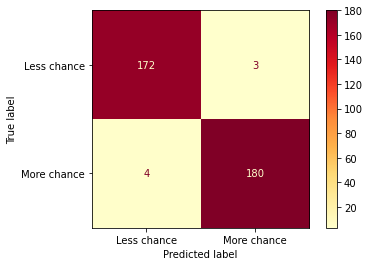

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_1 = metrics.accuracy_score(y_test, y_pred)

accuracy_1_rounded = round(accuracy_1*100, 2)

print("Accuracy k=1:", accuracy_1_rounded, "% \n")

print("Confusion matrix:")

plot_confusion_matrix(knn, X_test, y_test, display_labels=["Less chance", "More chance"], cmap=plt.cm.YlOrRd)
plt.show()

Accuracy k=3: 85.24 % 

Confusion matrix:


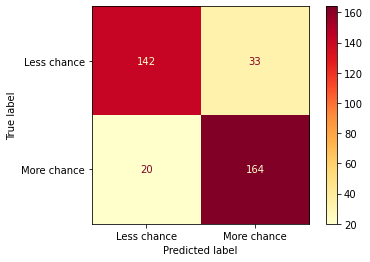

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_3 = metrics.accuracy_score(y_test, y_pred)

accuracy_3_rounded = round(accuracy_3*100, 2)

print("Accuracy k=3:", accuracy_3_rounded, "% \n")

print("Confusion matrix:")

plot_confusion_matrix(knn, X_test, y_test, display_labels=["Less chance", "More chance"], cmap=plt.cm.YlOrRd)
plt.show()

Accuracy k=5: 72.98 % 

Confusion matrix:


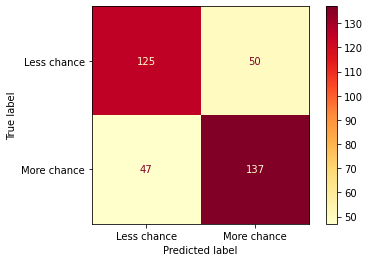

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_5 = metrics.accuracy_score(y_test, y_pred)

accuracy_5_rounded = round(accuracy_5*100, 2)

print("Accuracy k=5:", accuracy_5_rounded, "% \n")

print("Confusion matrix:")

plot_confusion_matrix(knn, X_test, y_test, display_labels=["Less chance", "More chance"], cmap=plt.cm.YlOrRd)
plt.show()

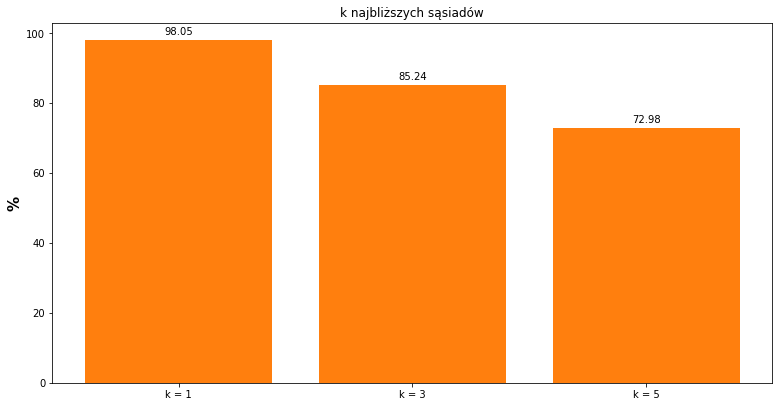

In [11]:
labels = ['k = 1', 'k = 3', 'k = 5']
accuracy = [accuracy_1_rounded, accuracy_3_rounded, accuracy_5_rounded]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])

x = np.arange(len(accuracy))
rects = ax.bar(x, accuracy)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

ax.bar(labels,accuracy)
plt.ylabel('%', fontweight ='bold', fontsize = 15)
plt.title("k najbliższych sąsiadów", fontsize=12)
plt.show()

### Naive Bayes

Accuracy Naive Bayes: 80.78 % 

Confusion matrix:


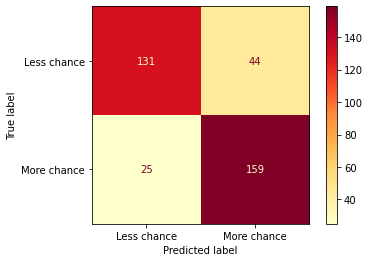

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy_bayes = metrics.accuracy_score(y_test, y_pred)

accuracy_bayes_rounded = round(accuracy_bayes*100, 2)

print("Accuracy Naive Bayes:", accuracy_bayes_rounded, "% \n")

print("Confusion matrix:")

plot_confusion_matrix(gnb, X_test, y_test, display_labels=["Less chance", "More chance"], cmap=plt.cm.YlOrRd)
plt.show()

### Drzewa decyzyjne 

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Accuracy decision tree:  99.16 % 

Confusion matrix:


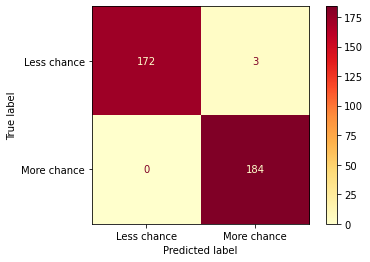

In [14]:
y_pred = clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred)

accuracy_tree_rounded = round(accuracy_tree*100,2)

print("Accuracy decision tree: ", accuracy_tree_rounded, "% \n")

print("Confusion matrix:")

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Less chance", "More chance"], cmap=plt.cm.YlOrRd)
plt.show()

### Drzewo decyzyjne w postaci grafu (out PDF)

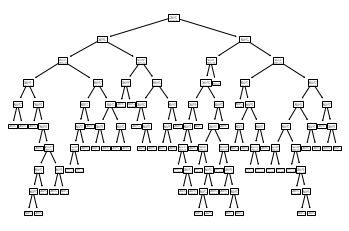

In [15]:
tree.plot_tree(clf) 
plt.savefig('out.pdf')

### Skuteczność klasyfikatorów

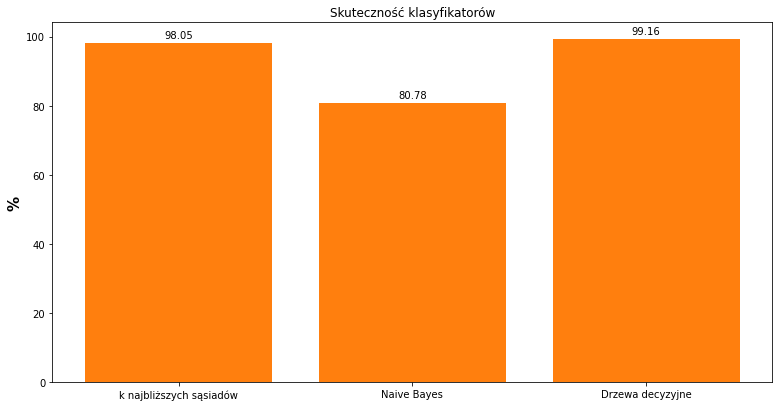

In [16]:
labels = ['k najbliższych sąsiadów', 'Naive Bayes', 'Drzewa decyzyjne']
accuracy = [accuracy_1_rounded, accuracy_bayes_rounded, accuracy_tree_rounded]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])

x = np.arange(len(accuracy))
rects = ax.bar(x, accuracy)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects)

ax.bar(labels,accuracy)
plt.ylabel('%', fontweight ='bold', fontsize = 15)
plt.title("Skuteczność klasyfikatorów", fontsize=12)
plt.show()

### Efektywność klasyfikatorów w zależnosci od zastosowania normalizacji/standaryzacji

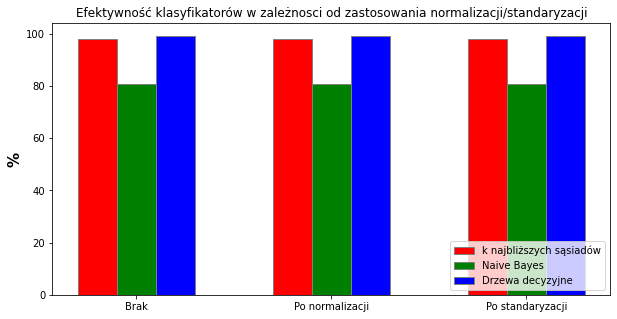

In [17]:
barWidth = 0.2
fig = plt.subplots(figsize=(10, 5))
 
knn = [accuracy_1_rounded, accuracy_1_rounded, accuracy_1_rounded]
bayes = [accuracy_bayes_rounded, accuracy_bayes_rounded, accuracy_bayes_rounded]
tree = [accuracy_tree_rounded, accuracy_tree_rounded, accuracy_tree_rounded]
 
br1 = np.arange(len(knn))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, knn, color ='r', width = barWidth,
        edgecolor ='grey', label ='k najbliższych sąsiadów')
plt.bar(br2, bayes, color ='g', width = barWidth,
        edgecolor ='grey', label ='Naive Bayes')
plt.bar(br3, tree, color ='b', width = barWidth,
        edgecolor ='grey', label ='Drzewa decyzyjne')
 
plt.ylabel('%', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(knn))],
        ['Brak', 'Po normalizacji', 'Po standaryzacji'])

plt.title("Efektywność klasyfikatorów w zależnosci od zastosowania normalizacji/standaryzacji", fontsize=12)
plt.legend(loc='lower right')
plt.show()

### Porównanie proporcji przy podziale na zbiór treningowy i testowy

| Proporcje | k najbliższych sąsiadów  | Naive Bayes | Drzewa decyzyjne |
|-|-|-:|-:|
| Testowy (0.3) Treningowy (0.7) | 99.03 % | 80.84 % | 99.03 % | 
| Testowy (0.33) Treningowy (0.67) | 97.94 % | 80.53 % | 99.12 % | 
| Testowy (0.35) Treningowy (0.65) | 98.05 % | 80.78 % | 99.16 % |
| Testowy (0.4) Treningowy (0.6) | 94.88 % | 80.98 % | 96.83 % |